In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc
import numpy as np
import scipy as sp
import datetime as dt
import netCDF4 as nc
import pickle
import cmocean as cm
import glob

%matplotlib inline

In [5]:
car_suffix = '_nitrate_means_perday_alg2.pkl'
car_suffix_sum = '_nitrate_sums_perday_alg2.pkl'

In [24]:


BR1 = 'BR_1st_2015'; BR2 = 'BR_2nd_2015'; LA1 = 'PI_1st_2015'; LA2 = 'PI_2nd_2015'; LA3 = 'PI_3rd_2015';
PI1 = 'PI_ACBC_2015'; PI2 = 'PI_ACBC_2015_2'; PI3 = 'PI_ACBC_2015_3'

LA3rr = 'LA3'
PI3rr = 'PI3'
PI3rr_old = 'PI3_old'

#var
BR1_var = pickle.load(open('./pickles/'+BR1+car_suffix , 'rb')) 
LA1_var = pickle.load(open('./pickles/'+LA1+car_suffix , 'rb'))
PI1_var = pickle.load(open('./pickles/'+PI1+car_suffix , 'rb'))
BR2_var = pickle.load(open('./pickles/'+BR2+car_suffix , 'rb')) 
LA2_var = pickle.load(open('./pickles/'+LA2+car_suffix , 'rb'))
PI2_var = pickle.load(open('./pickles/'+PI2+car_suffix , 'rb'))
LA3_var = pickle.load(open('./pickles/'+LA3+car_suffix , 'rb'))
PI3_var = pickle.load(open('./pickles/'+PI3+car_suffix , 'rb'))

BR1_var_sum = pickle.load(open('./pickles/'+BR1+car_suffix_sum , 'rb')) 
LA1_var_sum = pickle.load(open('./pickles/'+LA1+car_suffix_sum , 'rb'))
PI1_var_sum = pickle.load(open('./pickles/'+PI1+car_suffix_sum , 'rb'))
BR2_var_sum = pickle.load(open('./pickles/'+BR2+car_suffix_sum , 'rb')) 
LA2_var_sum = pickle.load(open('./pickles/'+LA2+car_suffix_sum , 'rb'))
PI2_var_sum = pickle.load(open('./pickles/'+PI2+car_suffix_sum , 'rb'))
LA3_var_sum = pickle.load(open('./pickles/'+LA3+car_suffix_sum , 'rb'))
PI3_var_sum = pickle.load(open('./pickles/'+PI3+car_suffix_sum , 'rb'))

PI3rr_var_sum = pickle.load(open('./pickles/'+PI3rr+car_suffix_sum , 'rb'))
PI3rr_old_var_sum = pickle.load(open('./pickles/'+PI3rr_old+car_suffix_sum , 'rb'))
LA3rr_var_sum = pickle.load(open('./pickles/'+LA3rr+car_suffix_sum , 'rb'))


mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')

csize = pickle.load(open('./pickles/cellsize_alg2.pkl', 'rb'))


In [7]:
#plot metrics

lw = 2
fs = 15
tcm = cm.cm.deep
fact = 0.7
ymin_top = 0
ymax_top = 24
ymin_bottom = 24
ymax_bottom = 32
ymin = 0
ymax = 32

In [8]:
BR_var = np.zeros([40,365*3])
#always spunup - the br2 case repeated 3 times
BR_varsp = np.zeros([40,365*3])

LA_var = np.zeros([40,365*3])
PI_var = np.zeros([40,365*3])

#load into one array
BR_var[:,0:365] = BR1_var
LA_var[:,0:365] = LA1_var
PI_var[:,0:365] = PI1_var
BR_var[:,365:2*365] = BR2_var
LA_var[:,365:2*365] = LA2_var
PI_var[:,365:2*365] = PI2_var
BR_var[:,2*365:3*365] = np.nan
LA_var[:,2*365:3*365] = LA3_var
PI_var[:,2*365:3*365] = PI3_var

BR_varsp[:,0:365] = BR2_var
BR_varsp[:,365:2*365] = BR2_var
BR_varsp[:,2*365:3*365] = BR2_var

BR_var_sum = np.zeros([40,365*3])
#always spunup - the br2 case repeated 3 times
BR_var_sumsp = np.zeros([40,365*3])

LA_var_sum = np.zeros([40,365*3])
PI_var_sum = np.zeros([40,365*3])

#load into one array
BR_var_sum[:,0:365] = BR1_var_sum
LA_var_sum[:,0:365] = LA1_var_sum
PI_var_sum[:,0:365] = PI1_var_sum
BR_var_sum[:,365:2*365] = BR2_var_sum
LA_var_sum[:,365:2*365] = LA2_var_sum
PI_var_sum[:,365:2*365] = PI2_var_sum
BR_var_sum[:,2*365:3*365] = np.nan
LA_var_sum[:,2*365:3*365] = LA3_var_sum
PI_var_sum[:,2*365:3*365] = PI3_var_sum

BR_var_sumsp[:,0:365] = BR2_var_sum
BR_var_sumsp[:,365:2*365] = BR2_var_sum
BR_var_sumsp[:,2*365:3*365] = BR2_var_sum


# VARIABLE: NITRATE

# [A] Visualize by-layer means of this variable on one plot, for all 8 runs

In [9]:
cellsize_alldomain = np.nansum(np.nansum(csize,axis = 1),axis = 1)
csize_broad = np.zeros((40,365*3))
for i in range(0,365*3):
    csize_broad[:,i] = cellsize_alldomain

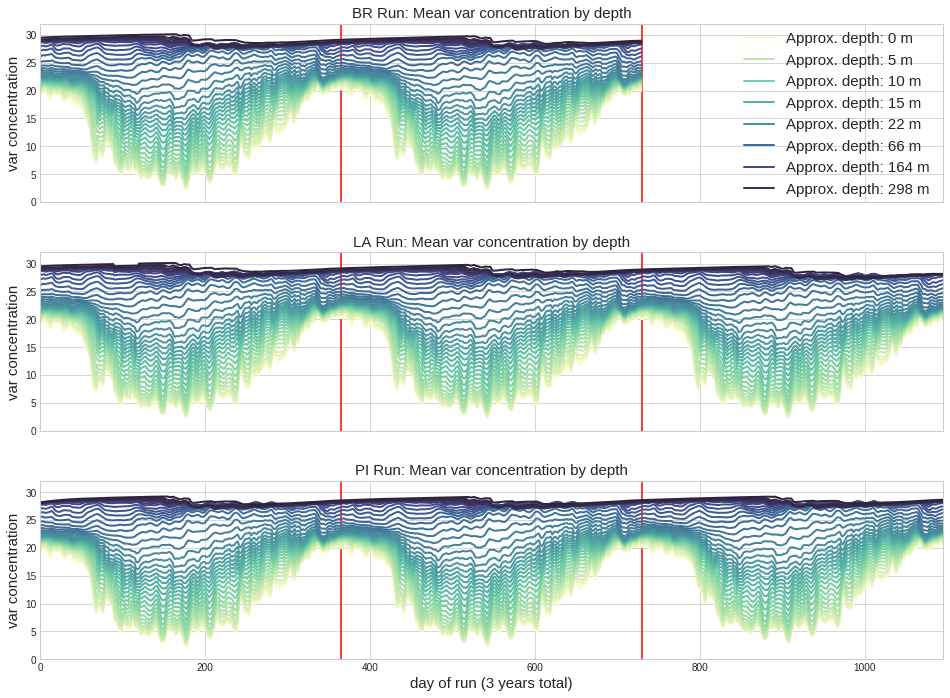

In [10]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth', fontsize = fs )

#LA
ax = fig.add_subplot(3,1,2)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,LA_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = 15)
plt.title('LA Run: Mean var concentration by depth', fontsize = fs )

#PI
ax = fig.add_subplot(3,1,3)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,PI_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
plt.title('PI Run: Mean var concentration by depth', fontsize = fs )
plt.xlabel('day of run (3 years total)', fontsize = fs)
plt.tight_layout()


# [B] Look closer at bottom and top 10 grid cells (just BR run)

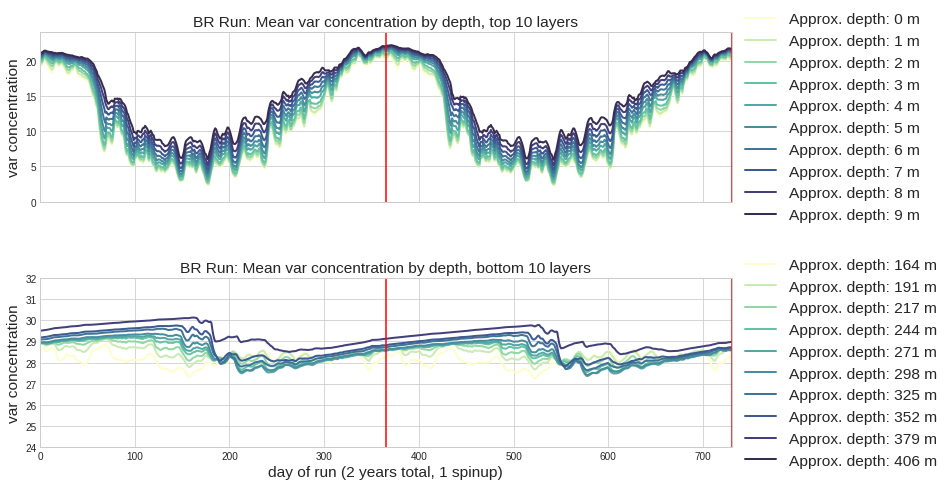

In [11]:
fact = 0.7
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)
lw = 2
tcm = cm.cm.deep
fs = 15.5

#BR
ax = fig.add_subplot(3,1,1)
for i in range(0,10):
    zdepth = np.sum(depth[0:i])
    if i%1 == 0:
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*i/10),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*2])
plt.ylim([ymin_top,ymax_top])
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.2, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth, top 10 layers', fontsize = fs )

ax = fig.add_subplot(3,1,2)
for i in range(30,40):
    zdepth = np.sum(depth[0:i])
    if i%1 == 0:
            ax.plot(days_in,BR_var[i,:],color = tcm(1.*(i-30)/10),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*2])
plt.ylim([ymin_bottom,ymax_bottom])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.2, 0, 0], fontsize = fs)
plt.title('BR Run: Mean var concentration by depth, bottom 10 layers', fontsize = fs )
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
plt.xlabel('day of run (2 years total, 1 spinup)', fontsize = fs)
plt.tight_layout()

# [C] By-depth mean differences, BR2 - BR1

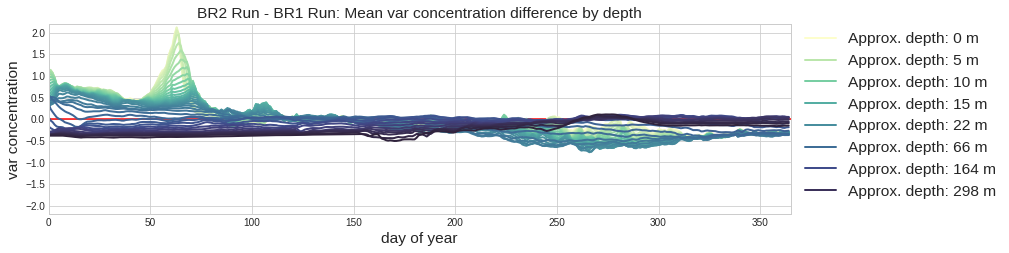

In [12]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,5*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(1,1,1)
#plt.axvline(x=365,color='r')
plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in[0:365],BR2_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in[0:365],BR2_var[i,:]-BR1_var[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*1])
plt.ylim([-2.2,2.2])
#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.set_xlabel('day of year', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
w = plt.title('BR2 Run - BR1 Run: Mean var concentration difference by depth', fontsize = fs )



# [D] Repeat the 1-year BR2 (supposedly 'spun up) run 3 times; subtract the LA and PI 3-year runs from it

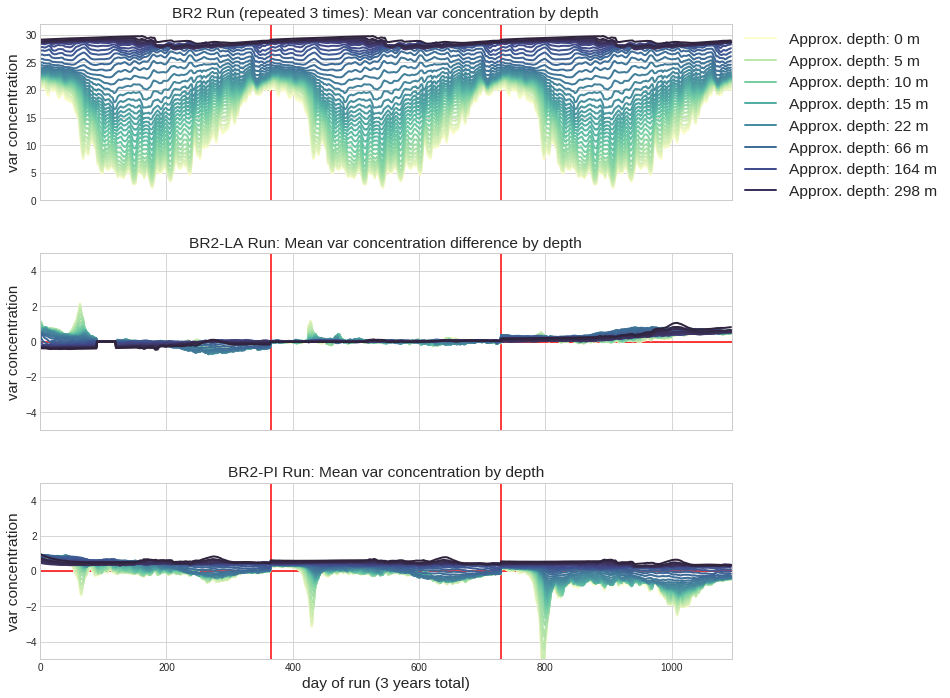

In [13]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_varsp[i,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_varsp[i,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([ymin,ymax])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR2 Run (repeated 3 times): Mean var concentration by depth', fontsize = fs )

#LA
ax = fig.add_subplot(3,1,2)
plt.axhline(y=0,color='r')
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_varsp[i,:]-LA_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([-5,5])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = 15)
plt.title('BR2-LA Run: Mean var concentration difference by depth', fontsize = fs )

#PI
ax = fig.add_subplot(3,1,3)
plt.axhline(y=0,color='r')
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,BR_varsp[i,:]-PI_var[i,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([-5,5])
#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
plt.title('BR2-PI Run: Mean var concentration by depth', fontsize = fs )
plt.xlabel('day of run (3 years total)', fontsize = fs)
plt.tight_layout()


# [E] For each run, look at gradient (difference between each layer and the layer above it). Where does it switch sign?

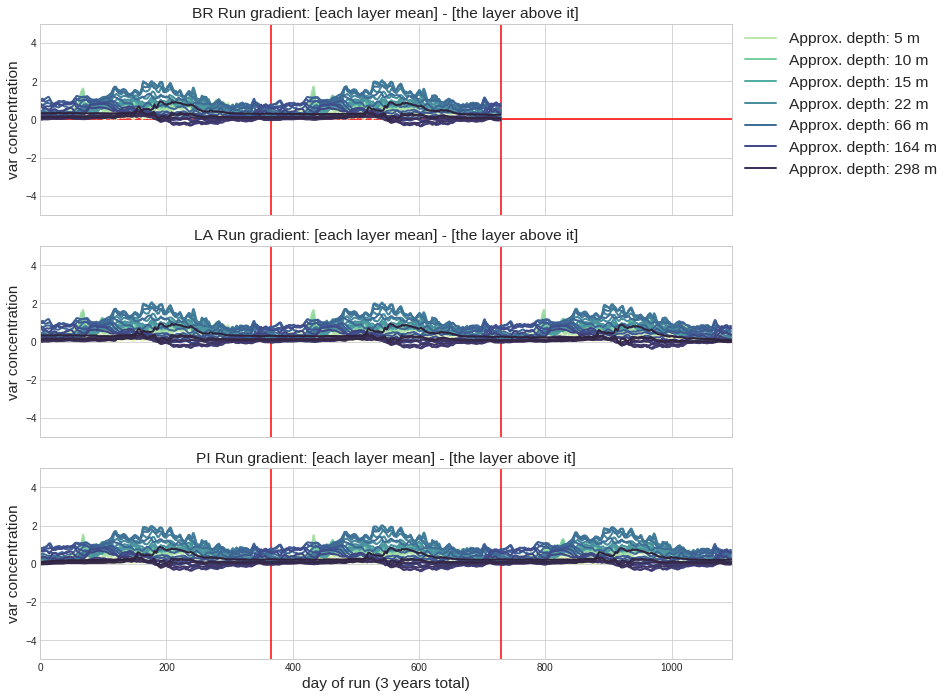

In [14]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR

ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
for i in range(1,40):
    zdepth = np.sum(depth[0:i])
    if i%5 !=0: 
        ax.plot(days_in,BR_var[i,:]-BR_var[i-1,:],color = tcm(1.*i/40), linewidth = lw)
    if i%5 == 0:
            ax.plot(days_in,BR_var[i,:]-BR_var[i-1,:],color = tcm(1.*i/40),\
                    label = 'Approx. depth: '+str(int(zdepth))+' m', linewidth = lw)
plt.xlim([0,365*3])
plt.ylim([-5,5])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
plt.title('BR Run gradient: [each layer mean] - [the layer above it]', fontsize = fs )

#LA
ax = fig.add_subplot(3,1,2)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,LA_var[i,:]-LA_var[i-1,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([-5,5])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = 15)
plt.title('LA Run gradient: [each layer mean] - [the layer above it]', fontsize = fs )

#PI
ax = fig.add_subplot(3,1,3)
plt.axvline(x=365,color='r')
plt.axvline(x=365*2,color='r')
for i in range(0,40):
    zdepth = np.sum(depth[0:i])
    ax.plot(days_in,PI_var[i,:]-PI_var[i-1,:],color = tcm(1.*i/40), linewidth = lw)

plt.xlim([0,365*3])
plt.ylim([-5,5])
#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
plt.title('PI Run gradient: [each layer mean] - [the layer above it]', fontsize = fs )
plt.xlabel('day of run (3 years total)', fontsize = fs)
plt.tight_layout()


# [F] BR2 depth profile, by day of year

Text(0.5, 0, 'variable concentration')

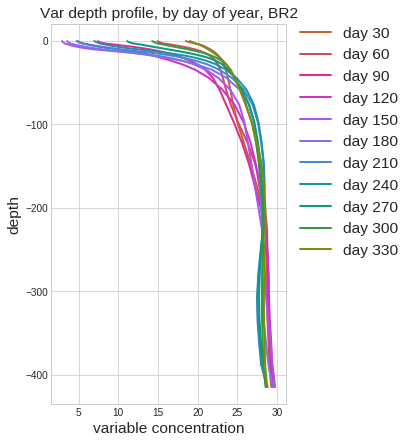

In [15]:
fig = plt.figure(figsize=(6*fact,10*fact))
ax = fig.add_subplot(1,1,1)
td = mesh['gdept_1d'][:]
td = np.squeeze(td)

for i in range(1,12):
    zdepth = np.sum(depth[0:i])
    #if i%5 !=0: 
    
    ax.plot(BR2_var[:,i*30],-td,color = cm.cm.phase(1.*i/12),\
            linewidth = lw, label = 'day '+str(i*30))
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)
ax.set_title('Var depth profile, by day of year, BR2',fontsize = fs)
ax.set_ylabel('depth', fontsize = fs)
ax.set_xlabel('variable concentration', fontsize = fs)

# [G] Sanity check: is the extracted by-layer mean the same as (extracted by-layer sum/ extracted size of domain)?

#### no. For DIC, max difference seems to be <20 mmol/m3. I think this may have to do with slightly different cell sizes? they're all the same depth, but they're different x and y sizes across the domain. the nanmean method would weight them all equally, while the nansum method would weight them by box size. 

test day : 250
test day : layer means
[ 8.07724857  8.26166344  8.58275509  8.99193001  9.71300411 10.42163181
 11.22754955 12.08454895 12.96021748 13.83679867 14.70105743 15.51856899
 16.29708862 17.03820229 17.7370224  18.40721512 19.05223656 19.69874573
 20.37783051 21.13877678 22.0249958  23.05078316 24.08378983 25.00113297
 25.90562057 26.74300003 27.3478508  27.73552513 28.02339935 28.16129303
 28.15879822 28.12137794 27.92668915 27.77406311 27.67298126 27.73706627
 27.93153954 28.10237312 28.62487221         nan]
test day : [layer sum/ layer size] check
[ 8.09071874  8.28127547  8.61146192  9.02388624  9.7531623  10.45749346
 11.25305748 12.09658988 12.95562059 13.81539172 14.66429031 15.4701502
 16.23629401 16.96300402 17.65207621 18.31114626 18.94348941 19.57777941
 20.24205871 20.9865372  21.85111333 22.85251571 23.87023792 24.79998558
 25.74227061 26.61028516 27.20879809 27.59857104 27.8697374  28.00934157
 27.9755518  27.88331928 27.73213265 27.65738894 27.64176174 27.72815

/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/home/tjarniko/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


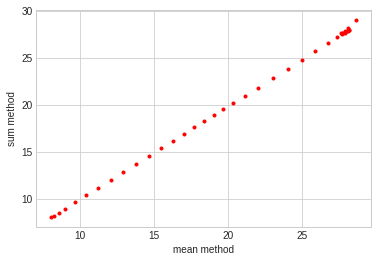

In [16]:
#print(np.shape(csize_broad))
#print(csize_broad[:,3])
td = 250
lm_check= BR_var[:,td]
lm_sum_check = BR_var_sum[:,td]/csize_broad[:,td]
plt.plot(lm_check,lm_sum_check,'.r')
plt.xlabel('mean method')
plt.ylabel('sum method')
print('test day : '+str(td))
print('test day : layer means')
print(lm_check)
print('test day : [layer sum/ layer size] check')
print(lm_sum_check)
print('test day : layer mean  - [layer sum/ layer size] check')
print(lm_check-lm_sum_check)
print('max difference')
print(np.nanmax(lm_check-lm_sum_check))
td = 50
lm_check= BR_var[:,td]
lm_sum_check = BR_var_sum[:,td]/csize_broad[:,td]
print('test day : '+str(td))
print('test day : layer means')
print(lm_check)
print('test day : [layer sum/ layer size] check')
print(lm_sum_check)
print('test day : layer mean  - [layer sum/ layer size] check')
print(lm_check-lm_sum_check)
print('max difference')
print(np.nanmax(lm_check-lm_sum_check))

In [17]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
#get udir, vdir, wdir
vdir = grid['e2t'][0,:,:]
udir = grid['e1t'][0,:,:]
wdir = grid['e3t_0'][0,:,:,:]
tmask = grid['tmask'][0,:,:,:]

# w = np.array([[2,3],[2,3]])
# x = np.array([[2,4],[2,3]])
# print(w*x)
surfa = vdir*udir
surfa_broad = np.zeros([40,898,398])
for i in range(0,40):
    surfa_broad[i,:,:] = surfa

csize_recalc = surfa_broad*wdir*tmask
csize_recalc[:,878:898,:] = 0
csize_recalc[:,:,0:20] = 0
csize_recalc[csize_recalc==0] = np.nan
cellsize = csize_recalc

testd = nc.Dataset('/data/tjarniko/results/BASERUN_EXP/MAIN/\
BR_2nd_2015/ncs/SKOG_1d_20151127_20151231_carp_T_20151227-20151227.nc')
testdic =testd['dissolved_inorganic_carbon'][0,:,:,:]
w = np.where((testdic == 0)&~np.isnan(cellsize))

# [H] domain totals and subdomain totals for all 3 runs on one plot (BR3 = BR2)

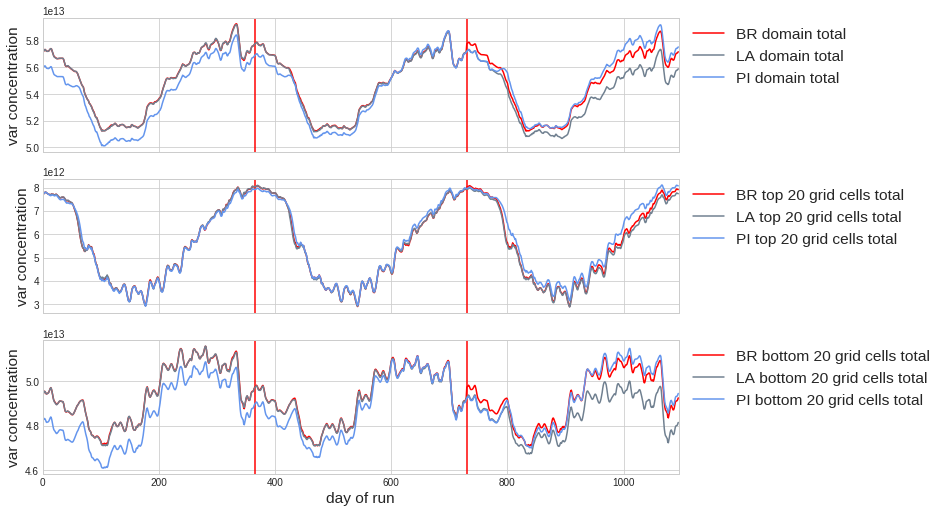

In [28]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[:,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[:,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[:,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

domsumBR[365*2:365*3] = domsumBR[365*1:365*2]

ax.plot(days_in,domsumBR,color = 'red', label = 'BR domain total')
ax.plot(days_in,domsumLA,color = 'slategrey', label = 'LA domain total')
ax.plot(days_in,domsumPI,color = 'cornflowerblue', label = 'PI domain total')

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

plt.xlim([0,365*3])

ax = fig.add_subplot(3,1,2)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[0:20,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[0:20,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[0:20,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumBR[365*2:365*3] = domsumBR[365*1:365*2]

ax.plot(days_in,domsumBR,color = 'red', label = 'BR top 20 grid cells total')
ax.plot(days_in,domsumLA,color = 'slategrey', label = 'LA top 20 grid cells total')
ax.plot(days_in,domsumPI,color = 'cornflowerblue', label = 'PI top 20 grid cells total')

plt.xlim([0,365*3])

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

ax = fig.add_subplot(3,1,3)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[20:40,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[20:40,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[20:40,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumBR[365*2:365*3] = domsumBR[365*1:365*2]

ax.plot(days_in,domsumBR,color = 'red', label = 'BR bottom 20 grid cells total')
ax.plot(days_in,domsumLA,color = 'slategrey', label = 'LA bottom 20 grid cells total')
ax.plot(days_in,domsumPI,color = 'cornflowerblue', label = 'PI bottom 20 grid cells total')

plt.xlim([0,365*3])

#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.set_xlabel('day of run', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


# [H] b PI3 and LA3, with rerun

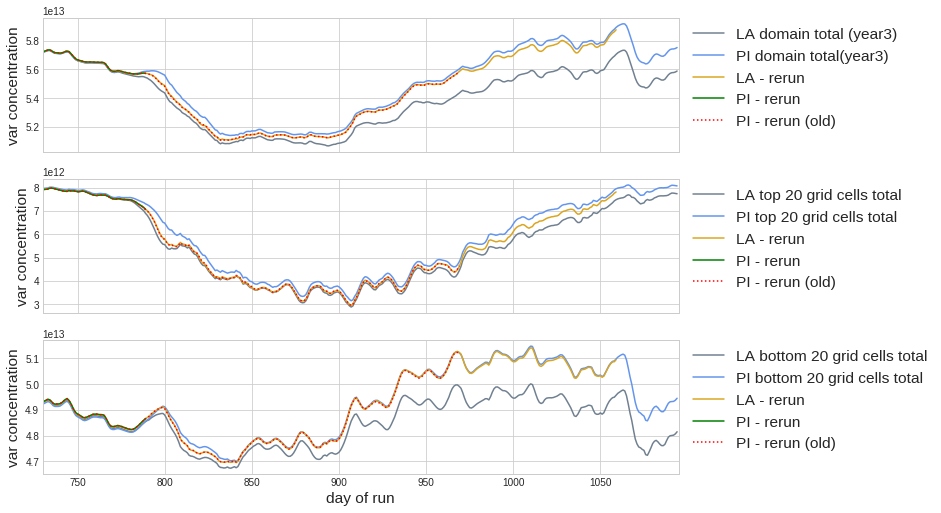

In [26]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[:,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[:,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[:,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[:,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[:,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan
domsumPI3rr_old = np.nansum(PI3rr_old_var_sum[:,:],axis =0)
domsumPI3rr_old[domsumPI3rr_old < 10] = np.nan


#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR domain total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA domain total (year3)')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI domain total(year3)')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr_old, color = 'red', linestyle =  ':' ,label = 'PI - rerun (old)')

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

plt.xlim([365*2,365*3])

ax = fig.add_subplot(3,1,2)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[0:20,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[0:20,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[0:20,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[0:20,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[0:20,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan
domsumPI3rr_old = np.nansum(PI3rr_old_var_sum[0:20,:],axis =0)
domsumPI3rr_old[domsumPI3rr_old < 10] = np.nan

#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr_old, color = 'red', linestyle = ':' ,label = 'PI - rerun (old)')


plt.xlim([365*2,365*3])

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

ax = fig.add_subplot(3,1,3)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[20:40,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[20:40,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[20:40,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[20:40,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[20:40,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan
domsumPI3rr_old = np.nansum(PI3rr_old_var_sum[20:40,:],axis =0)
domsumPI3rr_old[domsumPI3rr_old < 10] = np.nan

#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr_old, color = 'red', linestyle = ':' ,label = 'PI - rerun (old)')


plt.xlim([365*2,365*3])

#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.set_xlabel('day of run', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


Text(0.5, 0, 'day of run')

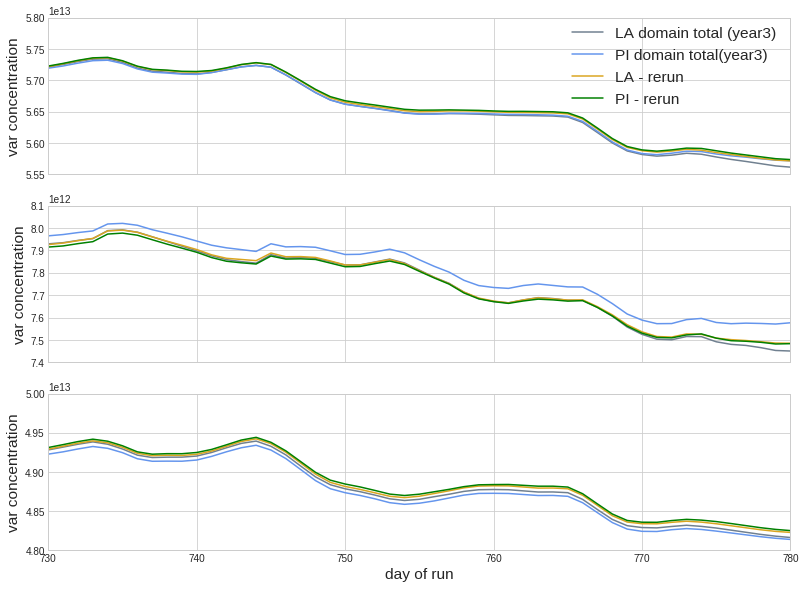

In [20]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[:,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[:,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[:,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[:,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[:,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan

#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR domain total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA domain total (year3)')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI domain total(year3)')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

plt.ylim([5.55e13,5.8e13])
plt.xlim([365*2,365*2+50])

ax = fig.add_subplot(3,1,2)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[0:20,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[0:20,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[0:20,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[0:20,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[0:20,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan

#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI top 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')

plt.ylim([7.4e12,8.1e12])
plt.xlim([365*2,365*2+50])

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
#ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

ax = fig.add_subplot(3,1,3)
#plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
#plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[20:40,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[20:40,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[20:40,:],axis =0)
domsumPI[domsumPI < 10] = np.nan
domsumLA3rr = np.nansum(LA3rr_var_sum[20:40,:],axis =0)
domsumLA3rr[domsumLA3rr < 10] = np.nan
domsumPI3rr = np.nansum(PI3rr_var_sum[20:40,:],axis =0)
domsumPI3rr[domsumPI3rr < 10] = np.nan

#ax.plot(days_in[365*2:365*3],domsumBR[365*2:365*3],color = 'red', label = 'BR bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA[365*2:365*3],color = 'slategrey', label = 'LA bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumPI[365*2:365*3],color = 'cornflowerblue', label = 'PI bottom 20 grid cells total')
ax.plot(days_in[365*2:365*3],domsumLA3rr, color = 'goldenrod', label = 'LA - rerun')
ax.plot(days_in[365*2:365*3],domsumPI3rr, color = 'green', label = 'PI - rerun')


plt.xlim([365*2,365*2+50])
plt.ylim([4.8e13,5.0e13])

#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.set_xlabel('day of run', fontsize = fs)
#ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)


# [H] c differences between PI3 and LA3

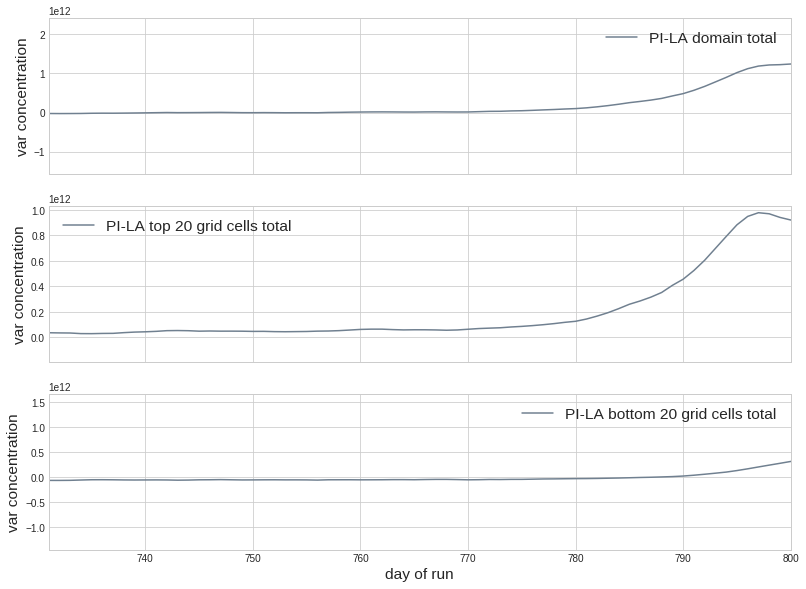

In [21]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,14*fact))
days_in = np.arange(0,365*3,1)

#BR
ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[:,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[:,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[:,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

#ax.plot(days_in,domsumBR,color = 'red', label = 'BR domain total')
ax.plot(days_in,domsumPI-domsumLA,color = 'slategrey', label = 'PI-LA domain total')
#ax.plot(days_in,,color = 'cornflowerblue', label = 'PI domain total')

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(loc = 'best', fontsize = fs)

plt.xlim([365*2+1,800])

ax = fig.add_subplot(3,1,2)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[0:20,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[0:20,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[0:20,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

#ax.plot(days_in,domsumBR,color = 'red', label = 'BR top 20 grid cells total')
ax.plot(days_in,domsumPI-domsumLA,color = 'slategrey', label = 'PI-LA top 20 grid cells total')
#ax.plot(days_in,,color = 'cornflowerblue', label = 'PI top 20 grid cells total')

plt.xlim([365*2+1,800])

ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(loc = 'best', fontsize = fs)

ax = fig.add_subplot(3,1,3)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[20:40,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[20:40,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[20:40,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

#ax.plot(days_in,domsumBR,color = 'red', label = 'BR bottom 20 grid cells total')
ax.plot(days_in,domsumPI-domsumLA,color = 'slategrey', label = 'PI-LA bottom 20 grid cells total')
#ax.plot(days_in,,color = 'cornflowerblue', label = 'PI bottom 20 grid cells total')

plt.xlim([365*2+1,800])

#ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.set_xlabel('day of run', fontsize = fs)
ax.legend(loc = 'best', fontsize = fs)


# [I] differences between BR2 run and all other runs, domain and subdomains, on one plot

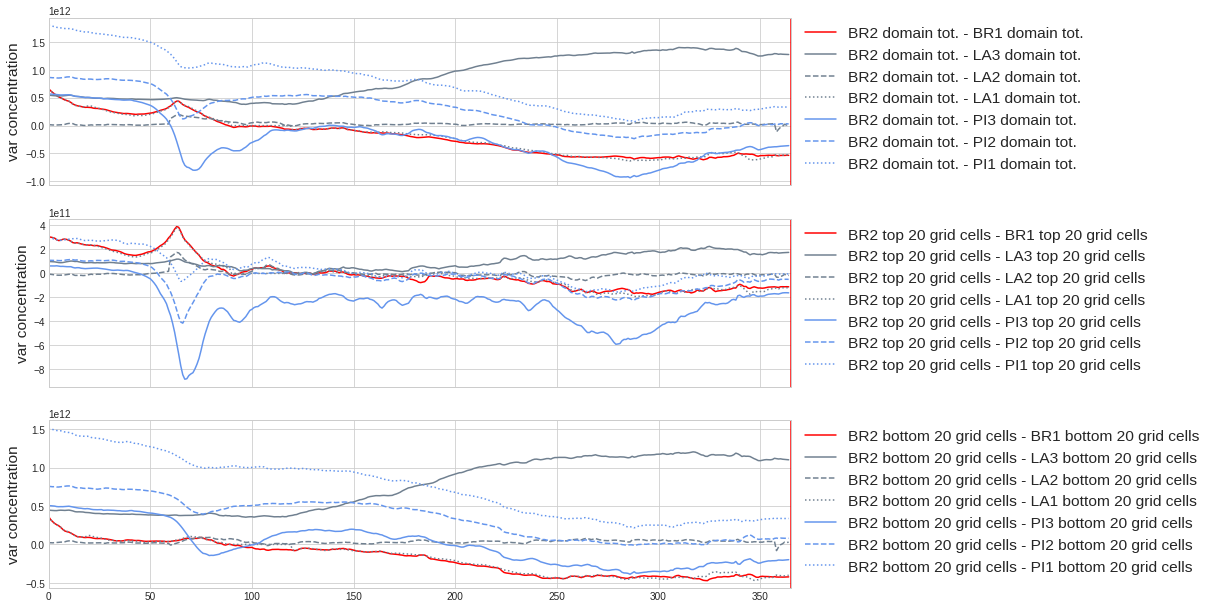

In [22]:
depth = mesh['e3t_0'][0,:,250,250]
fig = plt.figure(figsize=(19*fact,15*fact))
days_in = np.arange(0,365*3,1)
lw = 3
fact = .6

#BR
ax = fig.add_subplot(3,1,1)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[:,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[:,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[:,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumBR[0:365],color = 'red', label = 'BR2 domain tot. - BR1 domain tot.')

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*2:365*3],\
        color = 'slategrey', label = 'BR2 domain tot. - LA3 domain tot.')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*1:365*2],\
        color = 'slategrey', linestyle = '--', label = 'BR2 domain tot. - LA2 domain tot.')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*0:365*1],\
        color = 'slategrey', linestyle = ':', label = 'BR2 domain tot. - LA1 domain tot.')

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*2:365*3],\
        color = 'cornflowerblue', label = 'BR2 domain tot. - PI3 domain tot.')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*1:365*2],\
        color = 'cornflowerblue', linestyle = '--', label = 'BR2 domain tot. - PI2 domain tot.')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*0:365*1],\
        color = 'cornflowerblue', linestyle = ':', label = 'BR2 domain tot. - PI1 domain tot.')

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

ax = fig.add_subplot(3,1,2)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[0:20,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[0:20,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[0:20,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumBR[0:365],color = 'red', label = 'BR2 top 20 grid cells - BR1 top 20 grid cells')

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*2:365*3],\
        color = 'slategrey', label = 'BR2 top 20 grid cells - LA3 top 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*1:365*2],\
        color = 'slategrey', linestyle = '--', label = 'BR2 top 20 grid cells - LA2 top 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*0:365*1],\
        color = 'slategrey', linestyle = ':', label = 'BR2 top 20 grid cells - LA1 top 20 grid cells')

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*2:365*3],\
        color = 'cornflowerblue', label = 'BR2 top 20 grid cells - PI3 top 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*1:365*2],\
        color = 'cornflowerblue', linestyle = '--', label = 'BR2 top 20 grid cells - PI2 top 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*0:365*1],\
        color = 'cornflowerblue', linestyle = ':', label = 'BR2 top 20 grid cells - PI1 top 20 grid cells')

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

#plot 3

ax = fig.add_subplot(3,1,3)
plt.axvline(x=365,color='r')
# plt.axhline(y=0,color='r')
plt.axvline(x=365*2,color='r')
domsumBR = np.nansum(BR_var_sum[20:40,:],axis =0)
domsumBR[domsumBR < 10] = np.nan
domsumLA = np.nansum(LA_var_sum[20:40,:],axis =0)
domsumLA[domsumLA < 10] = np.nan
domsumPI = np.nansum(PI_var_sum[20:40,:],axis =0)
domsumPI[domsumPI < 10] = np.nan

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumBR[0:365],color = 'red', label = 'BR2 bottom 20 grid cells - BR1 bottom 20 grid cells')

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*2:365*3],\
        color = 'slategrey', label = 'BR2 bottom 20 grid cells - LA3 bottom 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*1:365*2],\
        color = 'slategrey', linestyle = '--', label = 'BR2 bottom 20 grid cells - LA2 bottom 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumLA[365*0:365*1],\
        color = 'slategrey', linestyle = ':', label = 'BR2 bottom 20 grid cells - LA1 bottom 20 grid cells')

ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*2:365*3],\
        color = 'cornflowerblue', label = 'BR2 bottom 20 grid cells - PI3 bottom 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*1:365*2],\
        color = 'cornflowerblue', linestyle = '--', label = 'BR2 bottom 20 grid cells - PI2 bottom 20 grid cells')
ax.plot(days_in[0:365],domsumBR[365:365*2]-domsumPI[365*0:365*1],\
        color = 'cornflowerblue', linestyle = ':', label = 'BR2 bottom 20 grid cells - PI1 bottom 20 grid cells')

plt.xlim([0,365])
#ax.set_xticklabels([])

ax.set_ylabel('var concentration', fontsize = fs)
ax.legend(bbox_to_anchor=[1.0, 1.03, 0, 0], fontsize = fs)

